#### References. https://github.com/rjurney/Agile_Data_Code_2

Intialize PySpark

In [1]:
from pyspark.sql import SparkSession


# Initialize PySpark with MongoDB support
APP_NAME = "Introducing PySpark"
spark = (
    SparkSession.builder.appName(APP_NAME)
    # Load support for MongoDB and Elasticsearch
    .config("spark.jars.packages", "org.mongodb.spark:mongo-spark-connector_2.12:3.0.1,org.elasticsearch:elasticsearch-spark-30_2.12:7.14.2")
    # Add Configuration for MongopDB
    .config("spark.mongodb.input.uri", "mongodb://mongo:27017/test.coll")
    .config("spark.mongodb.output.uri", "mongodb://mongo:27017/test.coll")

    .getOrCreate()
)
sc = spark.sparkContext
sc.setLogLevel("ERROR")

print("\nPySpark initialized...")

22/02/11 17:36:56 WARN Utils: Your hostname, kellyui-MacBookAir.local resolves to a loopback address: 127.0.0.1; using 192.168.0.3 instead (on interface en0)
22/02/11 17:36:56 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


:: loading settings :: url = jar:file:/Users/kelly/opt/anaconda3/lib/python3.9/site-packages/pyspark/jars/ivy-2.5.0.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /Users/kelly/.ivy2/cache
The jars for the packages stored in: /Users/kelly/.ivy2/jars
org.mongodb.spark#mongo-spark-connector_2.12 added as a dependency
org.elasticsearch#elasticsearch-spark-30_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-ba9a573f-b165-486c-b6be-c5cac458e813;1.0
	confs: [default]
	found org.mongodb.spark#mongo-spark-connector_2.12;3.0.1 in central
	found org.mongodb#mongodb-driver-sync;4.0.5 in central
	found org.mongodb#bson;4.0.5 in central
	found org.mongodb#mongodb-driver-core;4.0.5 in central
	found org.elasticsearch#elasticsearch-spark-30_2.12;7.14.2 in central
	found org.scala-lang#scala-reflect;2.12.8 in central
	found org.slf4j#slf4j-api;1.7.6 in central
	found commons-logging#commons-logging;1.1.1 in central
	found javax.xml.bind#jaxb-api;2.3.1 in central
	found com.google.protobuf#protobuf-java;2.5.0 in central
	found org.apache.spark#spark-yarn_2.12;3.0.1 in central
:: resolution repo


PySpark initialized...


In [2]:
# Load the parquet file containing flight delay records
on_time_df = spark.read.parquet('data/on_time_performance.parquet')

# Register the data for Spark SQL
on_time_df.registerTempTable("on_time_performance")

# Check out the columns
on_time_df.columns

/Users/kelly/opt/anaconda3/lib/python3.9/site-packages/pyspark/sql/dataframe.py:138: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn(


['Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'FlightDate',
 'Carrier',
 'TailNum',
 'FlightNum',
 'Origin',
 'OriginCityName',
 'OriginState',
 'Dest',
 'DestCityName',
 'DestState',
 'DepTime',
 'DepDelay',
 'DepDelayMinutes',
 'TaxiOut',
 'TaxiIn',
 'WheelsOff',
 'WheelsOn',
 'ArrTime',
 'ArrDelay',
 'ArrDelayMinutes',
 'Cancelled',
 'Diverted',
 'ActualElapsedTime',
 'AirTime',
 'Flights',
 'Distance',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay',
 'CRSDepTime',
 'CRSArrTime']

In [3]:
# select field and get result
trimmed_on_time = on_time_df.select("FlightDate", 
                                           "TailNum", 
                                           "Origin", 
                                           "Dest",
                                           "Carrier",
                                           "DepDelay",
                                           "ArrDelay")
trimmed_on_time.sample(False, 0.0001).show(10)
sampled_ten_percent = trimmed_on_time.sample(False, 0.1)
sampled_ten_percent.show(10)
                                           

+----------+-------+------+----+-------+--------+--------+
|FlightDate|TailNum|Origin|Dest|Carrier|DepDelay|ArrDelay|
+----------+-------+------+----+-------+--------+--------+
|2015-01-10| N851AA|   PHX| DFW|     AA|    -2.0|     3.0|
|2015-01-11| N827JB|   BOS| SFO|     B6|    17.0|    10.0|
|2015-01-11| N3740C|   SLC| MCO|     DL|    -5.0|   -24.0|
|2015-01-12| N229WN|   SMF| ONT|     WN|    17.0|    10.0|
|2015-01-12| N969WN|   IAD| DEN|     WN|    87.0|    54.0|
|2015-01-13| N534NK|   LAS| OAK|     NK|    -4.0|    -9.0|
|2015-01-13| N290SW|   SBP| LAX|     OO|     0.0|    -2.0|
|2015-01-13| N649SW|   PDX| SAN|     WN|    22.0|    19.0|
|2015-01-17| N552UW|   SLC| PHX|     US|     5.0|     5.0|
|2015-01-19| N467AA|   AUS| DFW|     AA|    -3.0|   -12.0|
+----------+-------+------+----+-------+--------+--------+
only showing top 10 rows

+----------+-------+------+----+-------+--------+--------+
|FlightDate|TailNum|Origin|Dest|Carrier|DepDelay|ArrDelay|
+----------+-------+------+---

In [4]:
fd = on_time_df.select("AirTime", "Distance")
fd.show(10)

+-------+--------+
|AirTime|Distance|
+-------+--------+
|   59.0|   432.0|
|   77.0|   432.0|
|  129.0|   802.0|
|   93.0|   731.0|
|  111.0|   769.0|
|  108.0|   769.0|
|  146.0|  1047.0|
|   null|  1007.0|
|   null|  1007.0|
|   null|   802.0|
+-------+--------+
only showing top 10 rows



In [5]:
hourly_fd = fd.select((fd.AirTime/60).alias('Hours'), "Distance")
hourly_fd.show(5)

+------------------+--------+
|             Hours|Distance|
+------------------+--------+
|0.9833333333333333|   432.0|
|1.2833333333333334|   432.0|
|              2.15|   802.0|
|              1.55|   731.0|
|              1.85|   769.0|
+------------------+--------+
only showing top 5 rows



In [6]:
miles_per_hour = hourly_fd.select((hourly_fd.Distance/hourly_fd.Hours).alias('Mph'))
miles_per_hour.show(10)          

+------------------+
|               Mph|
+------------------+
| 439.3220338983051|
| 336.6233766233766|
| 373.0232558139535|
|471.61290322580646|
| 415.6756756756757|
|427.22222222222223|
| 430.2739726027398|
|              null|
|              null|
|              null|
+------------------+
only showing top 10 rows



In [7]:
fd.select("AirTime",(fd.AirTime/60).alias('Hours'), "Distance").show()

+-------+------------------+--------+
|AirTime|             Hours|Distance|
+-------+------------------+--------+
|   59.0|0.9833333333333333|   432.0|
|   77.0|1.2833333333333334|   432.0|
|  129.0|              2.15|   802.0|
|   93.0|              1.55|   731.0|
|  111.0|              1.85|   769.0|
|  108.0|               1.8|   769.0|
|  146.0| 2.433333333333333|  1047.0|
|   null|              null|  1007.0|
|   null|              null|  1007.0|
|   null|              null|   802.0|
|   null|              null|   731.0|
|  122.0| 2.033333333333333|   731.0|
|   94.0|1.5666666666666667|   731.0|
|   91.0|1.5166666666666666|   731.0|
|  115.0|1.9166666666666667|   731.0|
|   89.0|1.4833333333333334|   731.0|
|  106.0|1.7666666666666666|   721.0|
|   94.0|1.5666666666666667|   748.0|
|   null|              null|   733.0|
|   null|              null|   733.0|
+-------+------------------+--------+
only showing top 20 rows



null값 처리

In [8]:
fd = on_time_df.select("AirTime", "Distance")
filled_fd = fd.filter(fd.AirTime.isNotNull())
hourly_fd = filled_fd.select("AirTime", (filled_fd.AirTime/60).alias('Hours'),"Distance")
mph = hourly_fd.select((hourly_fd.Distance/hourly_fd.Hours).alias('Mph'))
mph.show(10)

+------------------+
|               Mph|
+------------------+
| 439.3220338983051|
| 336.6233766233766|
| 373.0232558139535|
|471.61290322580646|
| 415.6756756756757|
|427.22222222222223|
| 430.2739726027398|
| 359.5081967213115|
|466.59574468085106|
|  481.978021978022|
+------------------+
only showing top 10 rows



In [9]:
from pyspark.sql.functions import avg
mph.select(avg(mph.Mph)).show()

+------------------+
|          avg(Mph)|
+------------------+
|408.72370268222824|
+------------------+



In [10]:
on_time_df.registerTempTable("on_time_performance")
mph = spark.sql("""
SELECT (Distance/(AirTime/60)) AS Mph
FROM on_time_performance
WHERE AirTime IS NOT NULL
ORDER BY AirTime
""")
mph.show(10)
mph.registerTempTable("mph")
spark.sql("SELECT AVG(Mph) from mph").show()

+-----------------+
|              Mph|
+-----------------+
|265.7142857142857|
|265.7142857142857|
|265.7142857142857|
|265.7142857142857|
|265.7142857142857|
|265.7142857142857|
|265.7142857142857|
|            232.5|
|            232.5|
|            232.5|
+-----------------+
only showing top 10 rows



+-----------------+
|         avg(Mph)|
+-----------------+
|408.7237026822374|
+-----------------+



Histogram

In [11]:
mph.select("Mph").rdd.flatMap(lambda x:x).histogram(10)

([32.34375,
  107.89626024590164,
  183.4487704918033,
  259.0012807377049,
  334.5537909836066,
  410.10630122950823,
  485.65881147540983,
  561.2113217213115,
  636.7638319672132,
  712.3163422131148,
  787.8688524590165],
 [174, 14255, 148314, 643901, 1861699, 2357002, 664609, 23997, 32, 25])

<BarContainer object of 10 artists>

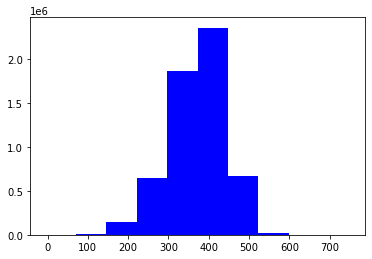

In [12]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

def draw_histogram(rdd_histogram_data):
    height=np.array(rdd_histogram_data[1])
    full_bins = rdd_histogram_data[0]
    mid_point_bins = full_bins[:-1]
    widths = [abs(i-j) for i, j in zip(full_bins[:-1], full_bins[1:])]
    bar = plt.bar(mid_point_bins, height, width=widths, color='b')
    return bar

departure_delay_histogram = mph.select("Mph").rdd.flatMap(lambda x:x).histogram(10)
draw_histogram(departure_delay_histogram)

<BarContainer object of 20 artists>

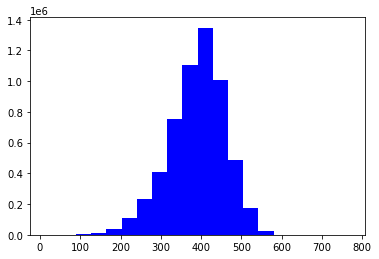

In [13]:
departure_delay_histogram = mph.select("Mph").rdd.flatMap(lambda x:x).histogram(20)
draw_histogram(departure_delay_histogram)

In [14]:
tail_numbers = on_time_df.rdd.map(lambda x:x.TailNum).filter(lambda x:x!='' and x is not None)
unique_tail_numbers = tail_numbers.distinct()
airplane_count = unique_tail_numbers.count()
print(f"Total Airplanes: {airplane_count}")

Total Airplanes: 4897


In [17]:
origin_hour_dist = on_time_df.filter(on_time_df.AirTime.isNotNull()).select("Origin", (on_time_df.AirTime/60).alias("Hours"), "Distance")
mph_origins = origin_hour_dist.select("Origin", (origin_hour_dist.Distance/origin_hour_dist.Hours).alias("Mph"))
mph_origins.registerTempTable("mph_origins")
avg_speeds = mph_origins.groupBy("Origin").agg({"Mph":"avg"}).alias("Mph")
avg_speeds.show()

/Users/kelly/opt/anaconda3/lib/python3.9/site-packages/pyspark/sql/dataframe.py:138: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn(


+------+------------------+
|Origin|          avg(Mph)|
+------+------------------+
|   BGM| 346.1853538898441|
|   PSE|452.61176800000527|
|   INL|286.26851316932084|
|   MSY|417.88066171277154|
|   PPG| 504.2422916767315|
|   GEG|402.28558929054554|
|   SNA|  417.168769940005|
|   BUR| 381.5411358971755|
|   GRB| 304.8341806425377|
|   GTF|425.33903080533736|
|   IDA|352.21033421102845|
|   GRR|345.74023303402765|
|   JLN| 333.8980691779108|
|   PSG|218.63993665683003|
|   EUG| 408.3697364617108|
|   PVD| 377.2849336122921|
|   GSO|363.15998763789804|
|   MYR|392.41545245530193|
|   OAK| 411.1720814918371|
|   MSN| 328.7109364653059|
+------+------------------+
only showing top 20 rows



In [18]:
on_time_df.columns

['Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'FlightDate',
 'Carrier',
 'TailNum',
 'FlightNum',
 'Origin',
 'OriginCityName',
 'OriginState',
 'Dest',
 'DestCityName',
 'DestState',
 'DepTime',
 'DepDelay',
 'DepDelayMinutes',
 'TaxiOut',
 'TaxiIn',
 'WheelsOff',
 'WheelsOn',
 'ArrTime',
 'ArrDelay',
 'ArrDelayMinutes',
 'Cancelled',
 'Diverted',
 'ActualElapsedTime',
 'AirTime',
 'Flights',
 'Distance',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay',
 'CRSDepTime',
 'CRSArrTime']

In [24]:
on_time_df.groupBy("Origin").avg().show(1)
on_time_df.groupBy("Origin").agg({"AirTime":"mean"}).show(1)
on_time_df.groupBy("Origin").count().show(1)
on_time_df.groupBy("Origin").agg({"AirTime":"max"}).show(1)
on_time_df.groupBy("Origin").max().show(1)
on_time_df.groupBy("Origin").agg({"AirTime":"min"}).show(1)
on_time_df.groupBy("Origin").agg({"AirTime":"sum"}).show(1)

+------+----------------+--------------------+------------------+---------------+-----------------+--------------------+--------------------+-------------+----------------------+-----------------+------------+-------------+-----------------+-----------------+------------------+--------------------+----------------------+
|Origin|   avg(DepDelay)|avg(DepDelayMinutes)|      avg(TaxiOut)|    avg(TaxiIn)|    avg(ArrDelay)|avg(ArrDelayMinutes)|      avg(Cancelled)|avg(Diverted)|avg(ActualElapsedTime)|     avg(AirTime)|avg(Flights)|avg(Distance)|avg(CarrierDelay)|avg(WeatherDelay)|     avg(NASDelay)|  avg(SecurityDelay)|avg(LateAircraftDelay)|
+------+----------------+--------------------+------------------+---------------+-----------------+--------------------+--------------------+-------------+----------------------+-----------------+------------+-------------+-----------------+-----------------+------------------+--------------------+----------------------+
|   BGM|9.42056074766355|  15.1

+------+-----------------+
|Origin|     avg(AirTime)|
+------+-----------------+
|   BGM|66.00934579439253|
+------+-----------------+
only showing top 1 row



+------+-----+
|Origin|count|
+------+-----+
|   BGM|  324|
+------+-----+
only showing top 1 row



+------+------------+
|Origin|max(AirTime)|
+------+------------+
|   BGM|        91.0|
+------+------------+
only showing top 1 row



+------+-------------+--------------------+------------+-----------+-------------+--------------------+--------------+-------------+----------------------+------------+------------+-------------+-----------------+-----------------+-------------+------------------+----------------------+
|Origin|max(DepDelay)|max(DepDelayMinutes)|max(TaxiOut)|max(TaxiIn)|max(ArrDelay)|max(ArrDelayMinutes)|max(Cancelled)|max(Diverted)|max(ActualElapsedTime)|max(AirTime)|max(Flights)|max(Distance)|max(CarrierDelay)|max(WeatherDelay)|max(NASDelay)|max(SecurityDelay)|max(LateAircraftDelay)|
+------+-------------+--------------------+------------+-----------+-------------+--------------------+--------------+-------------+----------------------+------------+------------+-------------+-----------------+-----------------+-------------+------------------+----------------------+
|   BGM|        993.0|                 993|       100.0|       30.0|       1005.0|              1005.0|             1|            0|    

+------+------------+
|Origin|min(AirTime)|
+------+------------+
|   BGM|        56.0|
+------+------------+
only showing top 1 row



+------+------------+
|Origin|sum(AirTime)|
+------+------------+
|   BGM|     21189.0|
+------+------------+
only showing top 1 row



In [26]:
on_time_df.filter("Origin == 'ATL'").groupBy("Origin").pivot("Dest").avg("AirTime").rdd.map(lambda x:x.asDict()).collect()[0]

{'Origin': 'ATL',
 'ABE': 96.59897959183674,
 'ABQ': 172.1290684624018,
 'ABY': 29.252365930599368,
 'ACY': 90.23557692307692,
 'AEX': 78.87462235649546,
 'AGS': 29.076743280093496,
 'ALB': 108.65161923454367,
 'ANC': 426.3529411764706,
 'ASE': 198.09574468085106,
 'ATW': 105.11235955056179,
 'AUS': 117.13764946048411,
 'AVL': 33.510327455919395,
 'AVP': 93.94900849858357,
 'AZO': 86.6842105263158,
 'BDL': 109.44785031847134,
 'BHM': 28.848588537211292,
 'BMI': 78.14963119072708,
 'BNA': 38.880419382261266,
 'BOS': 120.84425582313462,
 'BQK': 41.63483735571878,
 'BTR': 70.18819188191883,
 'BTV': 119.43465045592706,
 'BUF': 93.706432748538,
 'BWI': 81.02321908071394,
 'BZN': 220.15625,
 'CAE': 33.79744210162461,
 'CAK': 72.89645776566758,
 'CHA': 24.022727272727273,
 'CHO': 66.9613478691774,
 'CHS': 42.49556255367879,
 'CID': 101.25268817204301,
 'CLE': 77.47449470644851,
 'CLT': 41.581799591002046,
 'CMH': 66.05350605463249,
 'COS': 161.14626865671642,
 'CRW': 57.365990202939116,
 'CSG

In [27]:
mph = spark.sql("""
SELECT Distance, (Distance/(AirTime/60)) AS Mph
FROM on_time_performance
WHERE AirTime IS NOT NULL
""")
mph.show(10)

+--------+------------------+
|Distance|               Mph|
+--------+------------------+
|   432.0| 439.3220338983051|
|   432.0| 336.6233766233766|
|   802.0| 373.0232558139535|
|   731.0|471.61290322580646|
|   769.0| 415.6756756756757|
|   769.0|427.22222222222223|
|  1047.0| 430.2739726027398|
|   731.0| 359.5081967213115|
|   731.0|466.59574468085106|
|   731.0|  481.978021978022|
+--------+------------------+
only showing top 10 rows



In [30]:
distance = mph.select("Distance").rdd.flatMap(lambda x:x)
distance = distance.collect()
distance[0:10]

[432.0, 432.0, 802.0, 731.0, 769.0, 769.0, 1047.0, 731.0, 731.0, 731.0]

In [32]:
speed = mph.select("Mph").rdd.flatMap(lambda x:x)
speed = speed.collect()
speed[0:10]

[439.3220338983051,
 336.6233766233766,
 373.0232558139535,
 471.61290322580646,
 415.6756756756757,
 427.22222222222223,
 430.2739726027398,
 359.5081967213115,
 466.59574468085106,
 481.978021978022]

In [34]:
print(f"Total distance: {len(distance)}")
print(f"Total speeds: {len(speed)}")

Total distance: 5714008
Total speeds: 5714008


In [35]:
sample = mph.sample(False, 0.001)
sample.count()

5923

In [40]:
speed = sample.select("Mph").rdd.flatMap(lambda x:x).collect()
distance = sample.select("Distance").rdd.flatMap(lambda x:x).collect()
print(f"{len(speed)} x {len(distance)} records")

5923 x 5923 records


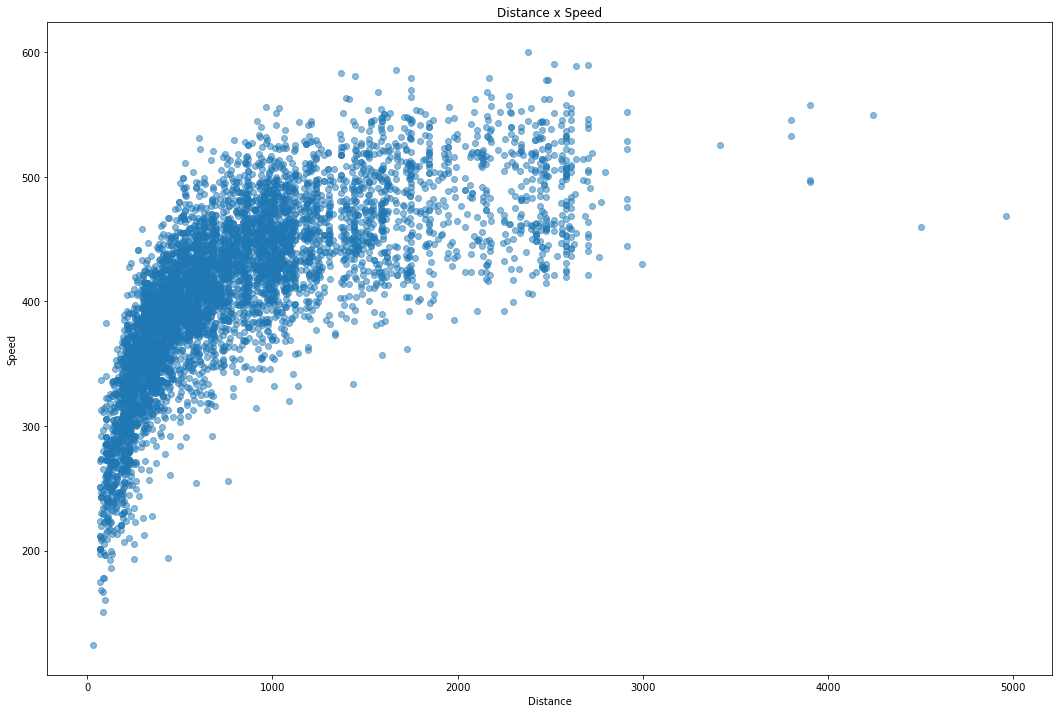

In [41]:
import numpy as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18, 12)
plt.scatter(distance, speed, alpha=0.5)
plt.title("Distance x Speed")
plt.xlabel("Distance")
plt.ylabel("Speed")
plt.show()

Excercise
- Query the on_time_dataframe to focus on two numeric fields.
- Plot a histogram of one of these fields
- Plot a scatterplot of both of these fields

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import numpy as np

x=np.array(distance)
y=np.array(speed)
x_test = np.arange(0, 5000, 100)
model = Pipeline([('ploy', PolynomialFeatures(degree=3)), ('linear', LinearRegression(fit_intercept=False))])
model = model.fit(x[:, np.newaxis], y)
model.named_steps['linear'].coef_
y_out = model.predict(x_test.reshape(-1, 1))
cross_val_score(model, x.reshape(-1, 1), y)

array([0.57219568, 0.64593494, 0.73797015, 0.72543734, 0.6432532 ])

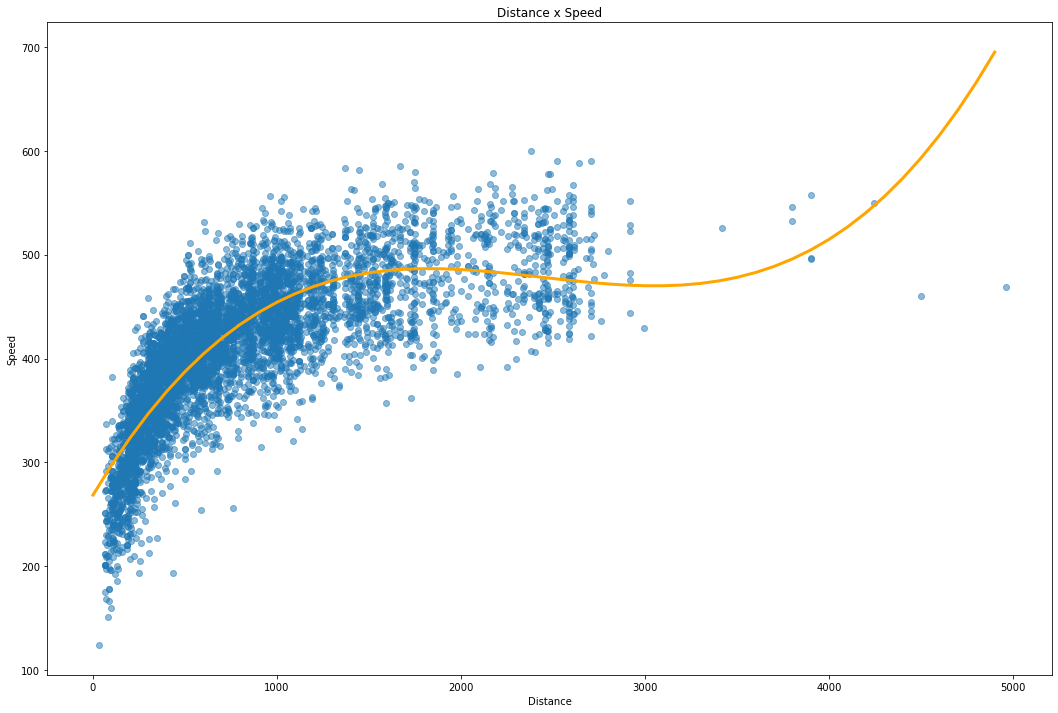

In [47]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=(18, 12)
plt.scatter(distance, speed, alpha=0.5)
plt.plot(x_test, y_out, color='orange', linewidth=3)
plt.title("Distance x Speed")
plt.xlabel("Distance")
plt.ylabel("Speed")
plt.show()

In [48]:
tail_numbers = on_time_df.select("TailNum").distinct()
tail_numbers.show(6)

+-------+
|TailNum|
+-------+
| N396AA|
| N3CWAA|
| N499AA|
| N4YUAA|
| N567AA|
| N442AS|
+-------+
only showing top 6 rows



In [49]:
faa_tail_number_inquiry = spark.read.json('data/faa_tail_number_inquiry.jsonl')
airplane_records = faa_tail_number_inquiry.select(
    faa_tail_number_inquiry.TailNum.alias("FAATailNum"), "Model", "Engine_Model")
airplane_records.show(6)

+----------+-----------+------------+
|FAATailNum|      Model|Engine_Model|
+----------+-----------+------------+
|    N933EV|CL-600-2B19| CF34 SERIES|
|    N917WN|    737-7H4|  CFM56-7B24|
|    N438WN|    737-7H4|CFM56 SERIES|
|    N283VA|   A320-214| CFM56-5B4/3|
|    N473UA|   A320-232| AL-25SERIES|
|    N637JB|   A320-232|    V2527-A5|
+----------+-----------+------------+
only showing top 6 rows



In [50]:
print(f"FAA tail number: {tail_numbers.count()}")
print(f"Airplane records: {airplane_records.count()}")
inner_joined = tail_numbers.join(airplane_records, tail_numbers.TailNum == airplane_records.FAATailNum, "inner")
print(f"Joined records: {inner_joined.count()}")

FAA tail number: 4898
Airplane records: 3988


Joined records: 3988


In [52]:
inner_joined.show(6)

+-------+----------+--------------+------------+
|TailNum|FAATailNum|         Model|Engine_Model|
+-------+----------+--------------+------------+
| N396AA|    N396AA|          B300|    PT6A SER|
| N499AA|    N499AA|DC-9-82(MD-82)| JT8D SERIES|
| N442AS|    N442AS|     737-990ER| CFM56-7B27E|
| N369NB|    N369NB|      A319-114|CFM56 SERIES|
| N388DA|    N388DA|       737-832|CFM56 SERIES|
|  N6700|     N6700|       757-232|      PW2037|
+-------+----------+--------------+------------+
only showing top 6 rows



In [55]:
print(f"FAA tail numbers: {tail_numbers.count()}")
print(f"Airplane records: {airplane_records.count()}")
left_outer_joined = tail_numbers.join(airplane_records, tail_numbers.TailNum == airplane_records.FAATailNum, 'left_outer')
print(f"Joined records: {left_outer_joined.count()}")

FAA tail numbers: 4898
Airplane records: 3988


Joined records: 4898


In [62]:
left_outer_joined.show(6)

+-------+----------+--------------+------------+
|TailNum|FAATailNum|         Model|Engine_Model|
+-------+----------+--------------+------------+
| N396AA|    N396AA|          B300|    PT6A SER|
| N3CWAA|      null|          null|        null|
| N499AA|    N499AA|DC-9-82(MD-82)| JT8D SERIES|
| N4YUAA|      null|          null|        null|
| N567AA|      null|          null|        null|
| N442AS|    N442AS|     737-990ER| CFM56-7B27E|
+-------+----------+--------------+------------+
only showing top 6 rows



Exercise

In [ ]:
flights = on_time_df.rdd.map(lambda x:(x.Carrier, x.FlightDate, x.FlightNum, x.Origin, x.Dest, x.TailNum))

flights_per_airplane = flights.map(lambda nameTuple:(nameTuple[5], [nameTuple[0:5]]))\
.reduceByKey(lambda a, b:a+b).map(lambda tuple:
                                  {
                                      'TailNum':tuple[0],
                                      'Flights':sorted(tuple[1], key=lambda x:(x[1], x[2], x[3], x[4]))
                                  }
                                 )
flights_per_airplane.first()

In [ ]:
# Filter down to the fields we need to identify and link to a flight
flights = on_time_df.rdd.map(
    lambda x: (x.Carrier, x.FlightDate, x.FlightNum, x.Origin, x.Dest, x.TailNum)
)

# Group flights by tail number, sorted by date, then flight number, then origin/dest
flights_per_airplane = flights\
  .map(lambda nameTuple: (nameTuple[5], [nameTuple[0:5]]))\
  .reduceByKey(lambda a, b: a + b)\
  .map(lambda tuple:
      {
        'TailNum': tuple[0], 
        'Flights': sorted(tuple[1], key=lambda x: (x[1], x[2], x[3], x[4]))
      }
    )
flights_per_airplane.first()